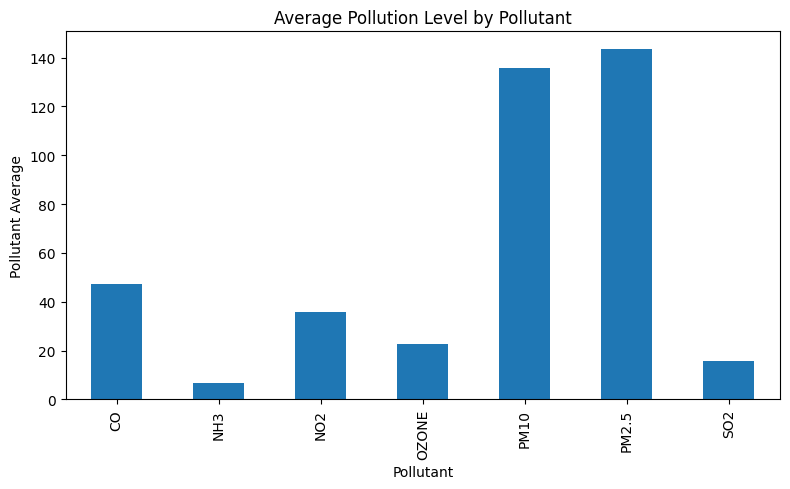

----------------------------------------------------------------------------------------------------


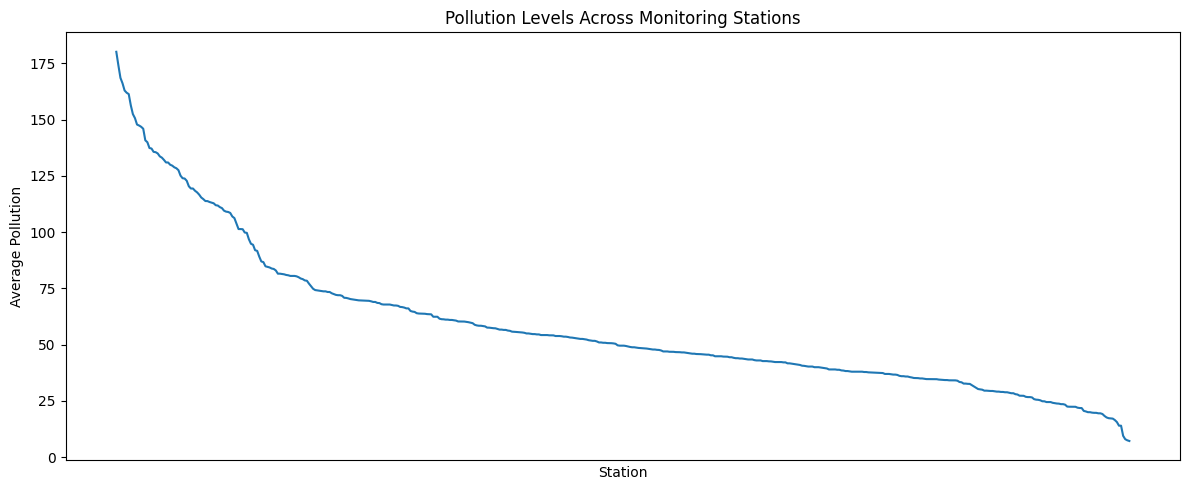

----------------------------------------------------------------------------------------------------


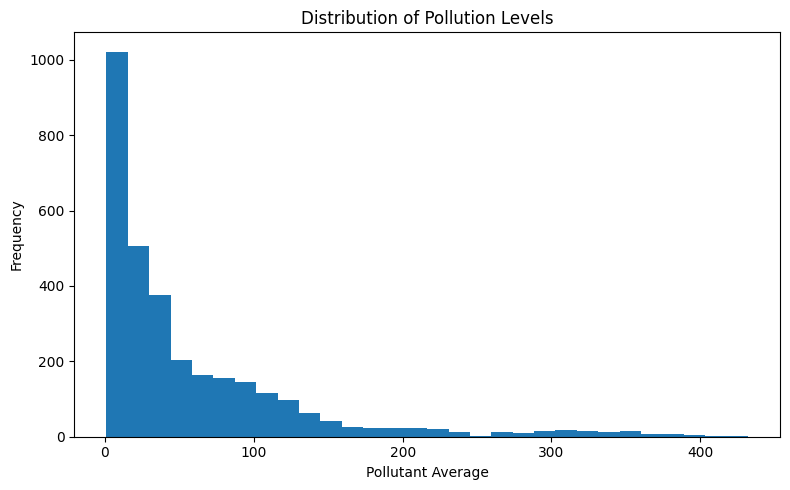

----------------------------------------------------------------------------------------------------


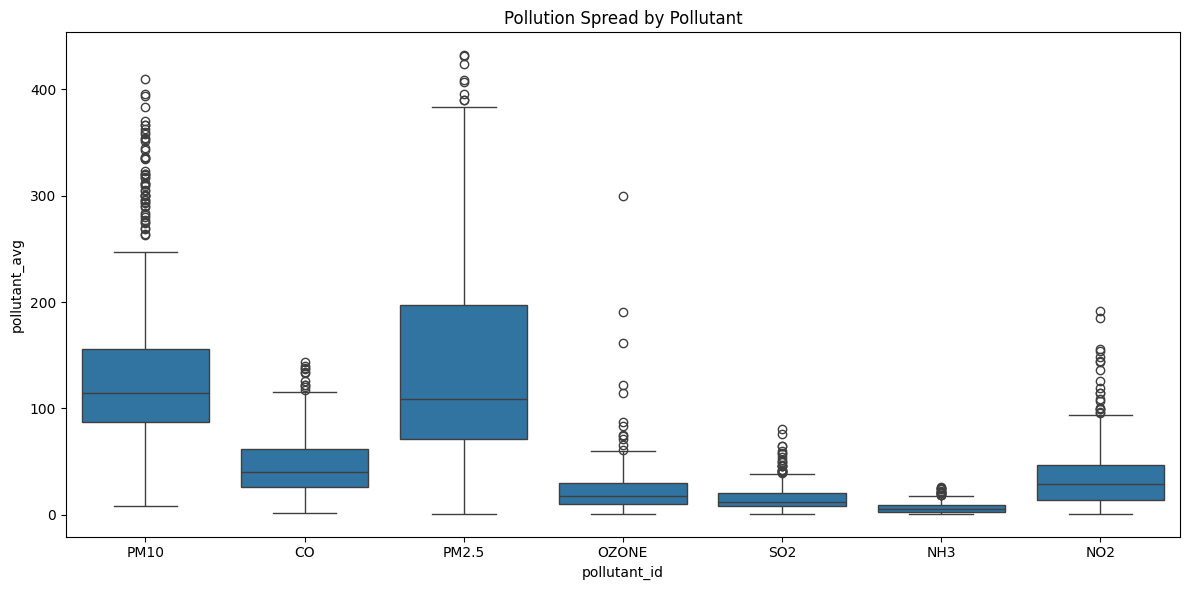

----------------------------------------------------------------------------------------------------


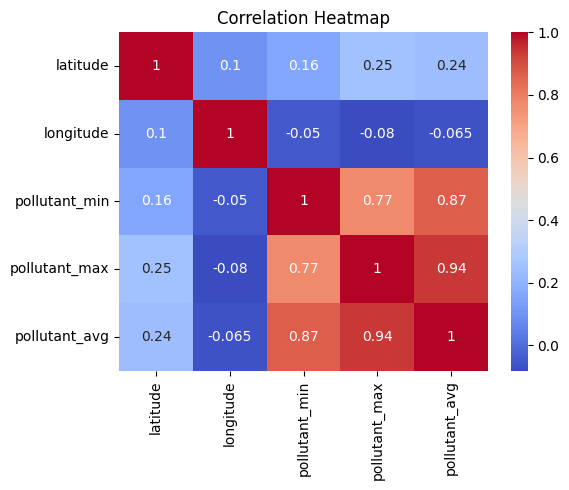

----------------------------------------------------------------------------------------------------


<Figure size 1800x800 with 0 Axes>

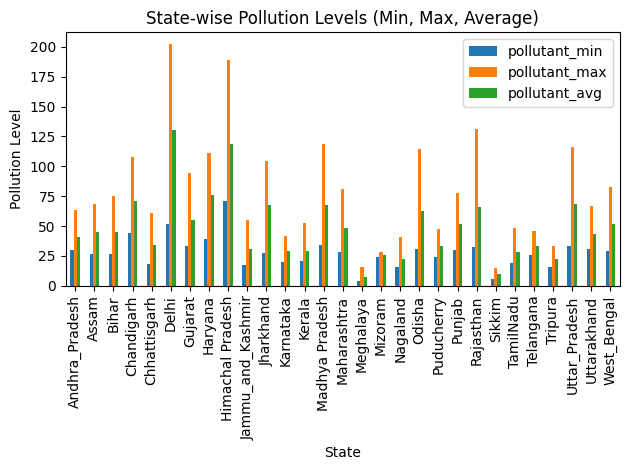

All analysis and visualizations completed successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Load Dataset
# =========================
df = pd.read_csv("aqi_analysis.csv")

# =========================
# Data Cleaning
# =========================
df = df.dropna(subset=["pollutant_min", "pollutant_max", "pollutant_avg"])
df["pollutant_id"] = df["pollutant_id"].str.strip()

# Working table
aqi = df[["state", "city", "station", "pollutant_id", "pollutant_avg"]]

# =========================
# BAR CHART – Avg by Pollutant
# =========================
pollutant_avg = aqi.groupby("pollutant_id")["pollutant_avg"].mean()

plt.figure(figsize=(8,5))
pollutant_avg.plot(kind="bar")
plt.title("Average Pollution Level by Pollutant")
plt.ylabel("Pollutant Average")
plt.xlabel("Pollutant")
plt.tight_layout()
plt.show()

print('-'*100)
# =========================
# LINE CHART – Pollution Across Stations
# =========================
station_avg = df.groupby("station")["pollutant_avg"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
station_avg.plot()
plt.title("Pollution Levels Across Monitoring Stations")
plt.ylabel("Average Pollution")
plt.xlabel("Station")
plt.xticks([])
plt.tight_layout()
plt.show()

print('-'*100)
# =========================
# HISTOGRAM – Distribution
# =========================
plt.figure(figsize=(8,5))
aqi["pollutant_avg"].plot(kind="hist", bins=30)
plt.title("Distribution of Pollution Levels")
plt.xlabel("Pollutant Average")
plt.tight_layout()
plt.show()
print('-'*100)

# =========================
# BOX PLOT – By Pollutant
# =========================
plt.figure(figsize=(12,6))
sns.boxplot(x="pollutant_id", y="pollutant_avg", data=aqi)
plt.title("Pollution Spread by Pollutant")
plt.tight_layout()
plt.show()

print('-'*100)
# =========================
# CORRELATION HEATMAP
# =========================
corr = df[["latitude","longitude","pollutant_min","pollutant_max","pollutant_avg"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print('-'*100)

# =========================
# STATE-WISE Min, Max, Avg (ALL STATES)
# =========================
state_stats = df.groupby("state").agg({
    "pollutant_min": "mean",
    "pollutant_max": "mean",
    "pollutant_avg": "mean"
})

plt.figure(figsize=(18,8))
state_stats.plot(kind="bar")
plt.title("State-wise Pollution Levels (Min, Max, Average)")
plt.ylabel("Pollution Level")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("All analysis and visualizations completed successfully.")
